In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [30]:
train_path = 'images_data/'
valid_path = 'images_data/' 
test_path = 'images_data/'

In [31]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(train_path, target_size=(224,224), classes = ['wesley', 'amey'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(valid_path, target_size=(224,224), 
  classes=['wesley','amey'], batch_size=10)

Found 63 images belonging to 2 classes.
Found 63 images belonging to 2 classes.


In [32]:
imgs, labels = next(train_batches)
print(imgs)

[[[[ 1.2806100e+02  1.1422100e+02  1.0332000e+02]
   [ 1.2706100e+02  1.1422100e+02  1.0732000e+02]
   [ 1.2806100e+02  1.1722100e+02  1.0432000e+02]
   ...
   [ 9.2060997e+01  8.5221001e+01  7.7320000e+01]
   [ 9.2060997e+01  8.3221001e+01  7.7320000e+01]
   [ 9.6060997e+01  8.4221001e+01  8.1320000e+01]]

  [[ 1.2606100e+02  1.1222100e+02  1.0132000e+02]
   [ 1.2706100e+02  1.1222100e+02  1.0532000e+02]
   [ 1.2906100e+02  1.1622100e+02  1.0332000e+02]
   ...
   [ 9.3060997e+01  8.5221001e+01  7.7320000e+01]
   [ 9.3060997e+01  8.4221001e+01  7.8320000e+01]
   [ 9.6060997e+01  8.4221001e+01  8.1320000e+01]]

  [[ 1.2606100e+02  1.0922100e+02  1.0132000e+02]
   [ 1.2506100e+02  1.1022100e+02  1.0332000e+02]
   [ 1.2806100e+02  1.1222100e+02  1.0032000e+02]
   ...
   [ 9.4060997e+01  8.5221001e+01  7.9320000e+01]
   [ 9.7060997e+01  8.8221001e+01  8.2320000e+01]
   [ 9.7060997e+01  8.5221001e+01  8.2320000e+01]]

  ...

  [[ 1.0206100e+02  7.0221001e+01  6.6320000e+01]
   [ 1.1206100e+

In [33]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

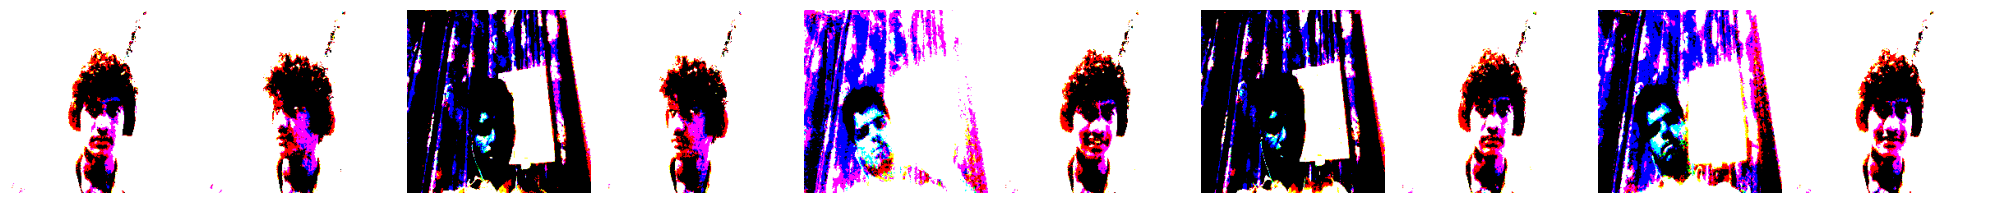

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [34]:
plotImages(imgs)
print(labels)

In [35]:
model = Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224, 224, 3)), MaxPool2D(pool_size=(2,2), strides=2),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'), 
  MaxPool2D(pool_size=(2,2), strides=2),
  Flatten(),
  Dense(units=2, activation='softmax'), 
])

In [36]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
7/7 - 2s - loss: 6.4956 - accuracy: 0.7778 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 2s/epoch - 219ms/step
Epoch 2/10
7/7 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 1s/epoch - 203ms/step
Epoch 3/10
7/7 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 1s/epoch - 185ms/step
Epoch 4/10
7/7 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 1s/epoch - 182ms/step
Epoch 5/10
7/7 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 1s/epoch - 181ms/step
Epoch 6/10
7/7 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 1s/epoch - 183ms/step
Epoch 7/10
7/7 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 1s/epoch - 179ms/step
Epoch 8/10
7/7 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 1s

In [53]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory='./predict/', target_size=(224, 224), classes=['amey', 'wesley'], batch_size=10, shuffle=False)

Found 4 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


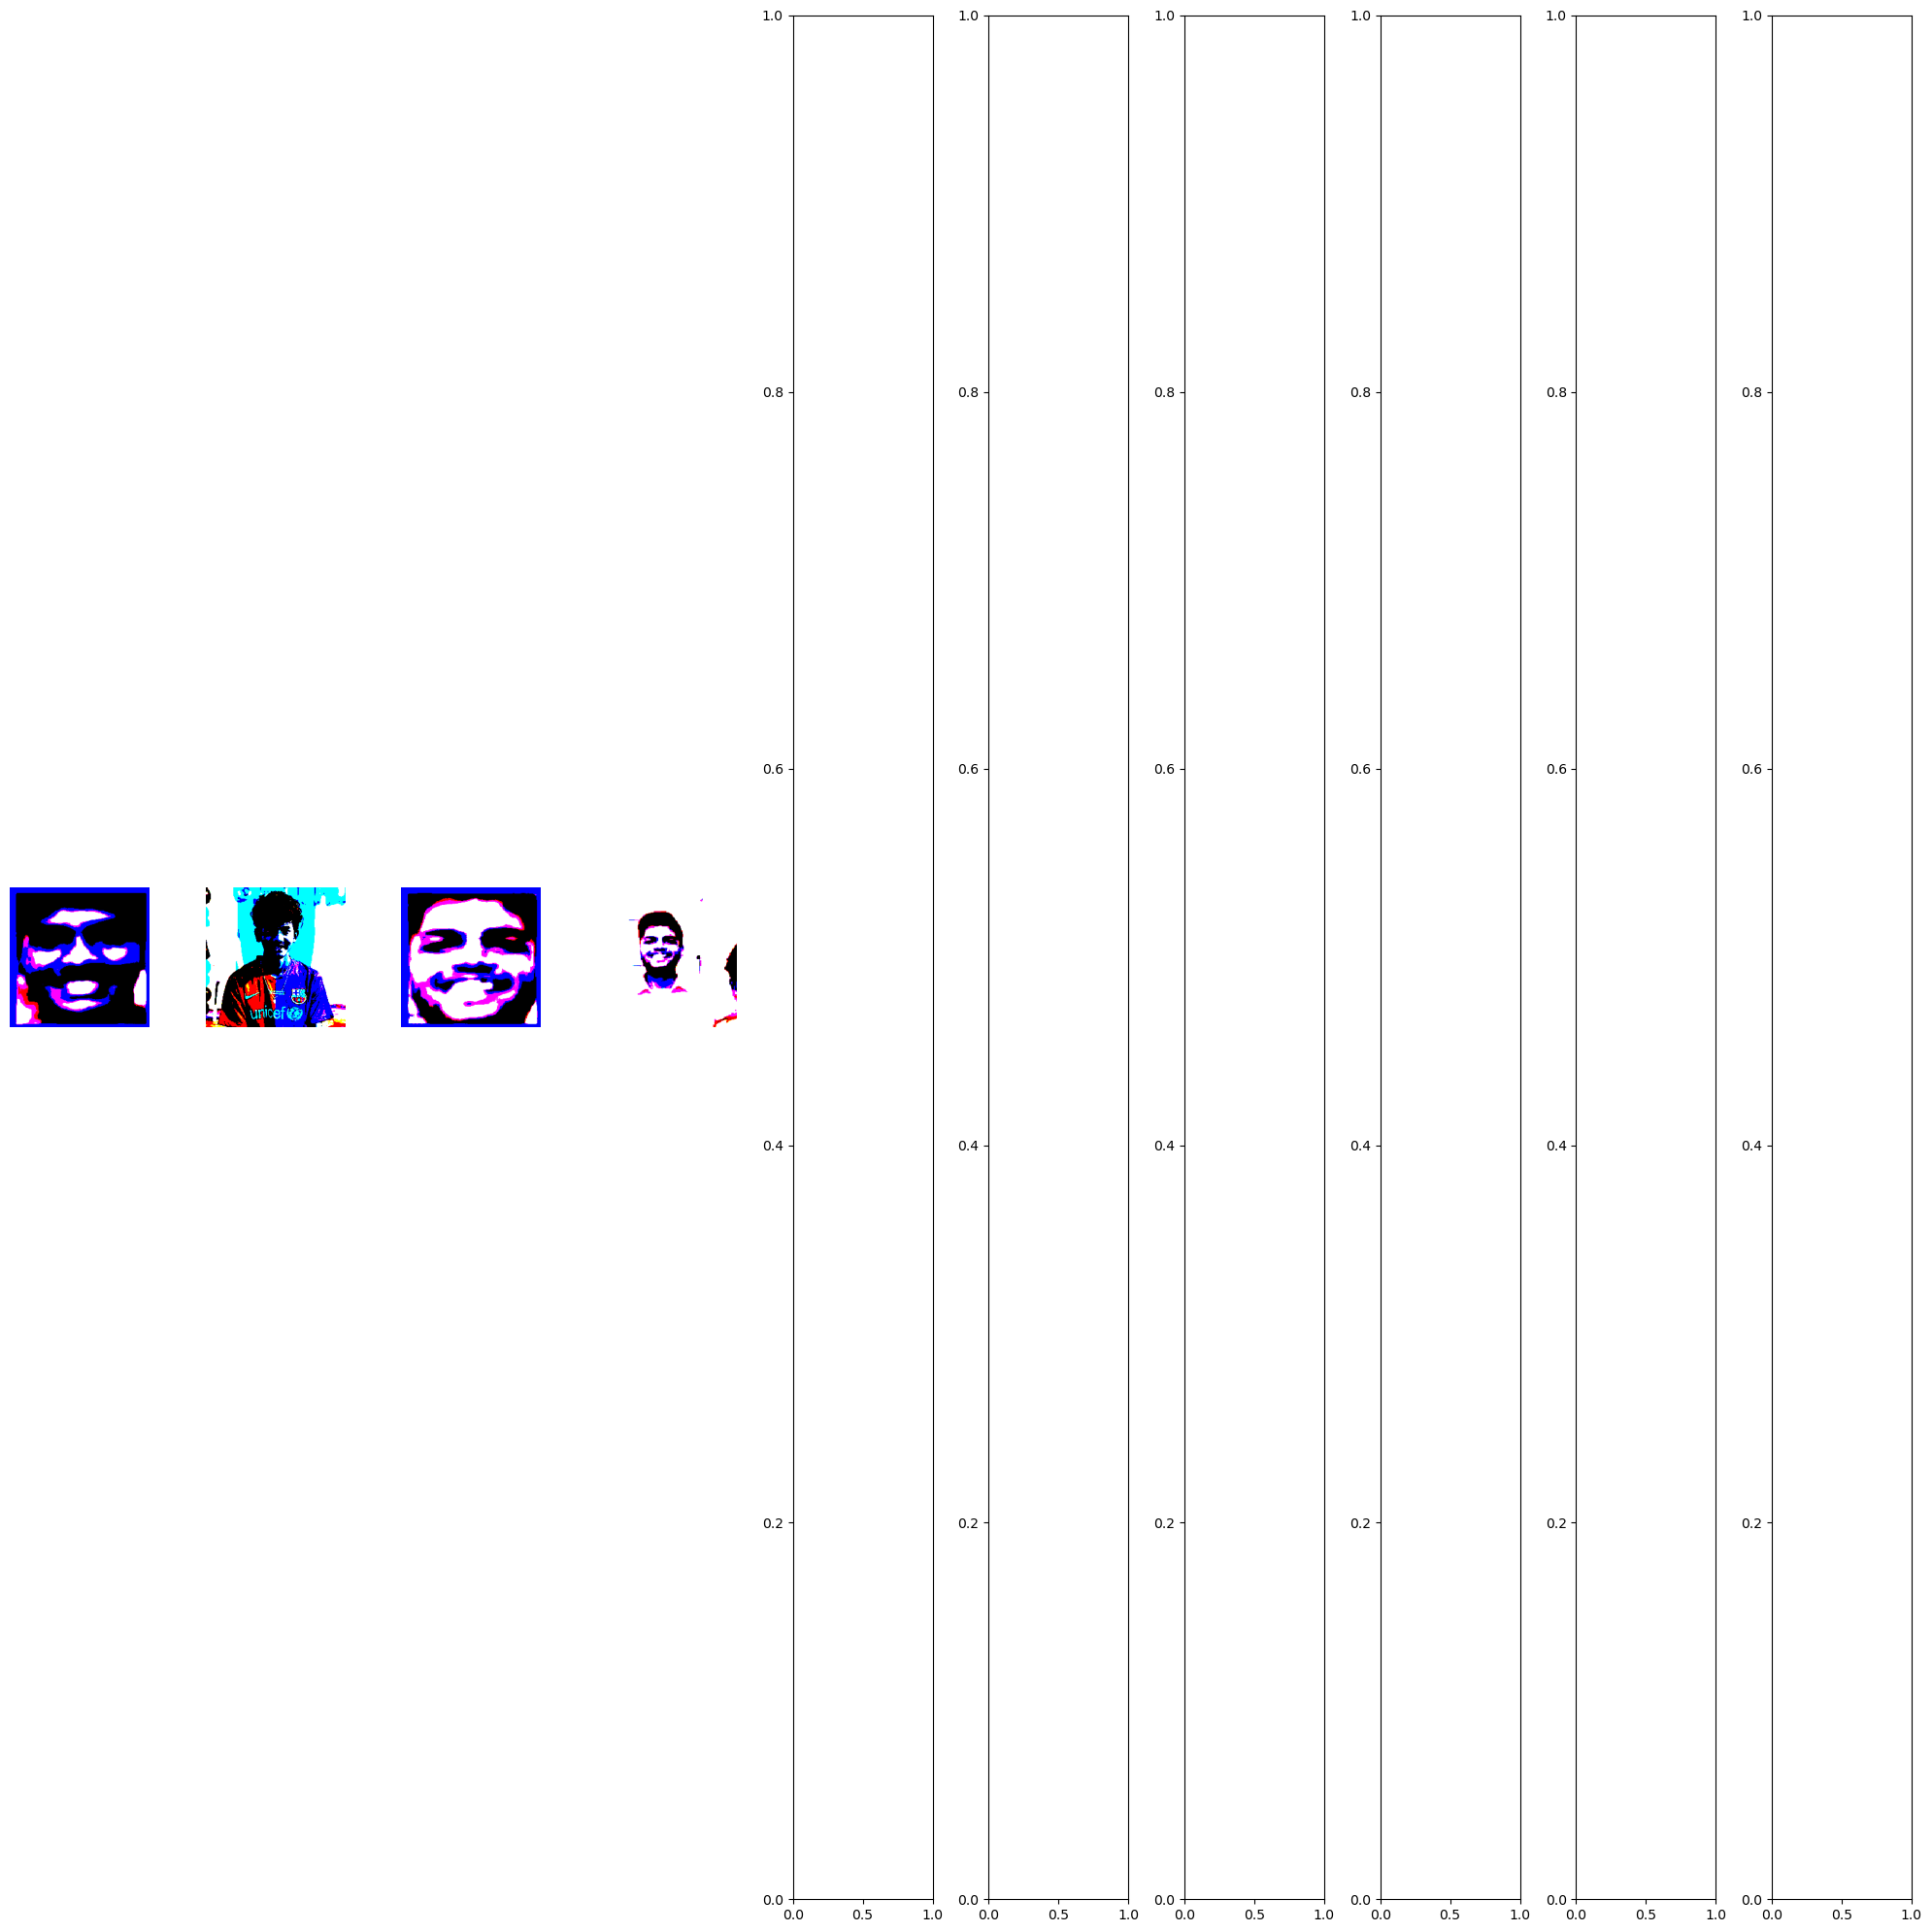

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [54]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [55]:
predictions = model.predict(x=test_batches, verbose=0)

In [56]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [57]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [51]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix, without normalization")

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")

In [58]:
test_batches.class_indices

{'amey': 0, 'wesley': 1}

Confusion Matrix, without normalization
[[2 0]
 [1 1]]


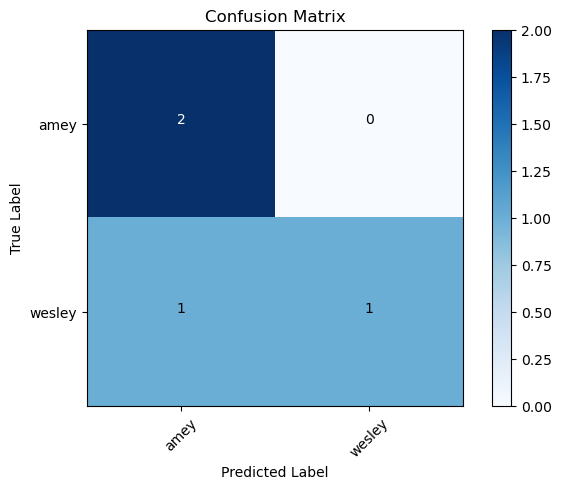

In [59]:
cm_plot_labels = ['amey', 'wesley']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")